In [16]:
import requests, io
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
url = 'https://raw.githubusercontent.com/Arbaaz-Shaikh/House-Prices-Prediction-in-Pune/master/Pune_House_Data.csv'

In [18]:
req = requests.get(url).content

In [19]:
data = pd.read_csv(io.StringIO(req.decode('utf-8')))

In [20]:
data.to_csv('data')

In [21]:
data.head(2)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk


# 

## Cleaning Data

In [22]:
data.dtypes

area_type         object
availability      object
size              object
society           object
total_sqft        object
bath             float64
balcony          float64
price            float64
site_location     object
dtype: object

In [23]:
data.shape

(13320, 9)

In [24]:
data.isna().sum()   #na values

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

<h2 style="color: Blue;">Showing each column Values<h2>

In [25]:
data.society.value_counts().index.to_list()

['GrrvaGr',
 'PrarePa',
 'Sryalan',
 'Prtates',
 'GMown E',
 'Prtanha',
 'Bhmesy ',
 'Prityel',
 'PrityTr',
 'Prarkun',
 'Dhalsh ',
 'IBityin',
 'SNity S',
 'Soresea',
 'Adeatlm',
 'Soitya ',
 'Rosha I',
 'Bhe 2ko',
 'SunceEs',
 'SNnia E',
 'JRrnauv',
 'MenueNo',
 'Prlla C',
 'PuandHi',
 'RothaVa',
 'Prncyrn',
 'GoAirej',
 'Aklia R',
 'Raard B',
 'PhestOn',
 'Puachal',
 'DLhtsnd',
 'Dieldli',
 'Itelaa ',
 'Soazak ',
 'Sodgere',
 'ViistLa',
 'Brnia G',
 'PualeSk',
 'Shitt S',
 'Soiewre',
 'Prrtht ',
 'DLhtsan',
 'RInceeg',
 'Brway G',
 'SoechHa',
 'DLhtsen',
 'AsastDe',
 'Eladero',
 'Shthi S',
 'Prersis',
 'Magiaya',
 'Jaades ',
 'Klark L',
 'PueraRi',
 'Brica E',
 'SSestth',
 'SaireSa',
 'Oreldhi',
 'Prensya',
 'KHatsFl',
 'Baowsig',
 'SSthamh',
 'Sariaat',
 'BrlisCo',
 'NRosete',
 'Sosisic',
 'GolusLi',
 'Tavenew',
 'Taonte ',
 'PuziaVe',
 'BriumMi',
 'Mayne A',
 'Pyikad ',
 'Bregae ',
 'Sovar S',
 'Mahosya',
 'Unm 2El',
 'Prcesvy',
 'SMuilan',
 'Shateor',
 'Emine P',
 'BrdgeNo',
 'Ko

In [26]:
len(data.site_location.value_counts().index.to_list())

97

# 

# size column

In [27]:
data['size'].value_counts() 

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [28]:
li = list()
for x in data['size']:
    if x == '1 RK':
        li.append(1)
    else :
        li.append(0)

In [29]:
data['RK'] = li 

In [30]:
data['size'][data['size'] == '1 RK'] = '0'

C:\Users\10\AppData\Local\Temp/ipykernel_13612/4245863773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['size'][data['size'] == '1 RK'] = '0'


In [31]:
data['size'] = data['size'].apply(lambda val : str(val)[:2] if (len(str(val)) > 2 ) else 0)

In [32]:
data['size'] = data['size'].replace('na', np.nan)

In [33]:
data['size'] = pd.to_numeric(data['size'])

C:\Users\10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


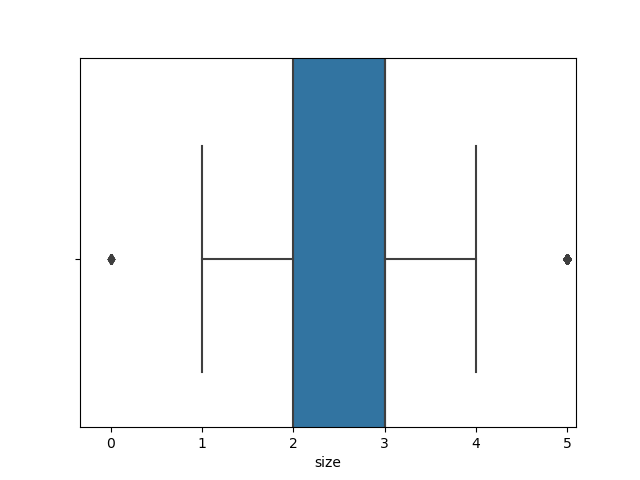

<AxesSubplot:xlabel='size'>

In [34]:
%matplotlib notebook
sns.boxplot(data['size'])

In [35]:
outliers = data[data['size'] > 4].index

In [36]:
data.drop(outliers, axis = 0, inplace= True)

<IPython.core.display.Javascript object>


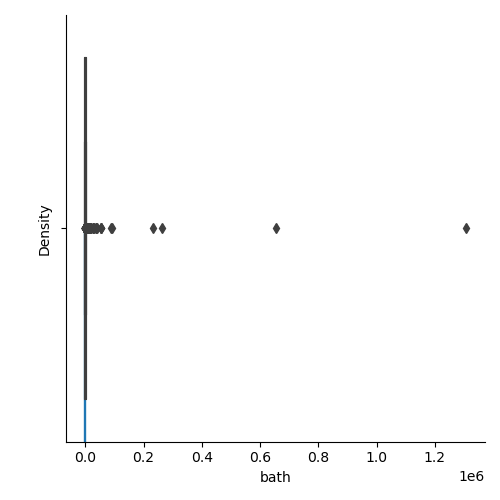

In [37]:
sns.displot(data['size'], kind='kde')

In [38]:
plt.hist(data['size'])
plt.show()

In [39]:
data['size'].mean()

2.5636538770268102

In [40]:
data['size'].median()

3.0

In [41]:
data.head(2)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location,RK
0,Super built-up Area,19-Dec,2.0,Coomee,1056,2.0,1.0,39.07,Alandi Road,0
1,Plot Area,Ready To Move,4.0,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,0


In [42]:
data['size'].fillna(data['size'].mean(), inplace= True)

In [43]:
data.isna().sum()

area_type           0
availability        0
size                0
society          4718
total_sqft          0
bath               70
balcony           452
price               0
site_location       1
RK                  0
dtype: int64

In [44]:
data.rename({'size':'room'}, inplace= True)

# 

# Availability column

In [45]:
data['availability'].isna().sum()

0

In [46]:
data['availability'].value_counts().index[:].tolist()

['Ready To Move',
 '18-Dec',
 '18-May',
 '18-Apr',
 '18-Aug',
 '19-Dec',
 '18-Jul',
 '18-Mar',
 '20-Dec',
 '18-Jun',
 '21-Dec',
 '19-Mar',
 '18-Feb',
 '18-Nov',
 '18-Jan',
 '18-Sep',
 '19-Jun',
 '18-Oct',
 '19-Jul',
 '19-Jan',
 '17-Dec',
 '20-Jan',
 '17-Oct',
 '19-Sep',
 '22-Jun',
 '19-Aug',
 '21-Jun',
 '19-Apr',
 'Immediate Possession',
 '20-Aug',
 '19-Oct',
 '21-Mar',
 '17-Jun',
 '21-May',
 '17-Jul',
 '17-Nov',
 '21-Jan',
 '20-Jun',
 '17-Sep',
 '22-Dec',
 '22-May',
 '19-May',
 '17-Aug',
 '21-Jul',
 '17-May',
 '20-Oct',
 '19-Nov',
 '17-Apr',
 '21-Feb',
 '20-Sep',
 '21-Oct',
 '22-Jan',
 '21-Sep',
 '21-Aug',
 '20-Jul',
 '17-Mar',
 '20-Nov',
 '16-Dec',
 '20-Apr',
 '20-May',
 '21-Nov',
 '16-Mar',
 '22-Mar',
 '19-Feb',
 '20-Mar',
 '22-Nov',
 '16-Sep',
 '15-Oct',
 '17-Feb',
 '15-Nov',
 '20-Feb',
 '15-Jun',
 '16-Jul',
 '14-Nov',
 '15-Dec',
 '16-Oct',
 '15-Aug',
 '17-Jan',
 '16-Nov',
 '16-Jan',
 '14-Jul']

In [47]:
li = list()
for x in data['availability']:
    if x == 'Ready To Move':
        li.append(1)
    else :
        li.append(0)

In [48]:
data['Ready_to_move'] = li 

In [49]:
data['availability'][data['availability'] == 'Ready To Move'] = '10-Ready To Move'
data['availability'][data['availability'] == 'Immediate Possession'] = '10-Immediate Possession'

C:\Users\10\AppData\Local\Temp/ipykernel_13612/3984562216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability'][data['availability'] == 'Ready To Move'] = '10-Ready To Move'
C:\Users\10\AppData\Local\Temp/ipykernel_13612/3984562216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability'][data['availability'] == 'Immediate Possession'] = '10-Immediate Possession'


In [50]:
data['availability'] = data['availability'].apply(lambda val : str(val)[3:])

In [51]:
data['availability'].value_counts()

Ready To Move           9770
Dec                      724
May                      333
Apr                      290
Aug                      248
Mar                      242
Jul                      205
Jun                      199
Jan                      121
Oct                       91
Sep                       87
Nov                       79
Feb                       69
Immediate Possession      16
Name: availability, dtype: int64

In [52]:
data.drop(data[data.availability == 'Immediate Possession'].index,axis=0 , inplace = True)

In [53]:
data.head(2)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location,RK,Ready_to_move
0,Super built-up Area,Dec,2.0,Coomee,1056,2.0,1.0,39.07,Alandi Road,0,0
1,Plot Area,Ready To Move,4.0,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1


# 

In [54]:
for i in data.total_sqft.value_counts().index:
    print(i)

1200
1100
1500
1000
600
2400
1350
1050
1300
1250
1400
900
1150
1600
1140
1800
2000
1450
1075
1650
1020
1160
1125
1550
1180
1255
1700
950
1260
1220
1080
1070
800
1225
1175
700
3000
1240
1060
1320
2500
750
1230
1210
1185
1280
2100
1410
1270
850
1170
1190
1025
1750
1290
1330
1310
1065
1194
1215
1090
1850
1115
1360
500
1464
1430
1530
1205
1900
1340
1165
1145
2200
1128
1035
1130
1120
1560
1040
1275
4000
1355
3500
1155
1105
1420
1245
1216
1680
1460
1760
1475
2700
1010
1305
650
1590
1110
1030
883
1495
985
1246
1015
1385
1027
2600
525
1315
1575
1325
1370
1243
1610
1470
1440
660
1540
1390
550
1645
1365
925
1265
1520
1570
1480
920
1195
2800
1196
1665
980
975
3200
1485
1345
1095
1640
2072
1820
1525
1012
940
1232
1157
1295
1235
645
935
1375
960
1197
1830
1425
1490
1655
400
1418
1720
1580
630
1920
1285
1135
1045
1152
1116
1085
1740
1153
5000
4800
1660
905
1950
1141
2300
1595
1445
450
1630
1535
1710
1282
1690
2215
1615
675
720
3600
1005
1380
1625
1510
1082
1730
1843
1404
1691
1339
1435
1314
1455
156

In [55]:
data.head(2)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location,RK,Ready_to_move
0,Super built-up Area,Dec,2.0,Coomee,1056,2.0,1.0,39.07,Alandi Road,0,0
1,Plot Area,Ready To Move,4.0,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1


In [56]:
def tazbit(val):
    if len(val) == 1 or len(val) == 2 or len(val) == 3 :
        return pd.to_numeric(val)
        
    elif val[-4] == 'c':                    #Acres
        return pd.to_numeric(val[:-5])*43560
    
    elif len(val) <= 7 :
        return pd.to_numeric(val)
    
    elif val[-1] == 'r':                     #Sq. Meter   
        return pd.to_numeric(val[:-9])*10.7639104
    
    elif val[-2] == 'h':                     #Guntha  
        return pd.to_numeric(val[:-6])*1089
    
    elif val[-2] == 'd':                    # Sq. Yards
        return pd.to_numeric(val[:-9])*9
    
    elif val[-1] == 's':                    # Grounds
        return pd.to_numeric(val[:-7])*2400 
    
    else :
        li = val.split()
        return ((  pd.to_numeric(li[0]) + pd.to_numeric(li[2])  )/2 )


In [57]:
print(tazbit('545Guntha'))
print(type(tazbit('545Guntha')))

593505
<class 'numpy.int64'>


In [58]:
data.total_sqft = data.total_sqft.apply(tazbit)

In [59]:
data.head(2)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location,RK,Ready_to_move
0,Super built-up Area,Dec,2.0,Coomee,1056.0,2.0,1.0,39.07,Alandi Road,0,0
1,Plot Area,Ready To Move,4.0,Theanmp,2600.0,5.0,3.0,120.00,Ambegaon Budruk,0,1


In [60]:
data.total_sqft.min()

1.0

In [61]:
data.total_sqft.max()

1306800.0

In [62]:
sns.boxplot(data.total_sqft)

C:\Users\10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

In [63]:
outliers = data[data.total_sqft > 2350].index

In [64]:
outliers

Int64Index([    1,     6,     7,    11,    18,    22,    30,    56,    60,
               62,
            ...
            13205, 13208, 13229, 13246, 13268, 13290, 13293, 13299, 13316,
            13318],
           dtype='int64', length=1257)

In [65]:
data.drop(outliers, axis=0, inplace= True)

In [66]:
outliers = data[data.total_sqft < 440].index

In [67]:
outliers

Int64Index([  119,   177,   349,   410,   504,   593,   741,   942,   992,
             1016,  1020,  1471,  1510,  2041,  2071,  2311,  2437,  2486,
             2557,  3274,  3577,  3741,  4086,  4604,  4853,  4876,  4943,
             5285,  5410,  5970,  6179,  6586,  6964,  7070,  7075,  7405,
             7616,  7657,  7724,  7800,  8242,  8288,  8355,  8430,  8494,
             8517,  8545,  8655,  8725,  8845,  8859,  8890,  9102, 10043,
            10509, 10526, 10892, 11091, 11117, 11165, 11202, 11425, 11495,
            11509, 11558, 11861, 11932, 11945, 12464, 12579, 13216],
           dtype='int64')

In [68]:
data.drop(outliers, axis=0, inplace= True)

In [69]:
data.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location,RK,Ready_to_move
0,Super built-up Area,Dec,2.0,Coomee,1056.0,2.0,1.0,39.07,Alandi Road,0,0
2,Built-up Area,Ready To Move,3.0,NaN,1440.0,2.0,3.0,62.00,Anandnagar,0,1
3,Super built-up Area,Ready To Move,3.0,Soiewre,1521.0,3.0,1.0,95.00,Aundh,0,1
4,Super built-up Area,Ready To Move,2.0,NaN,1200.0,2.0,1.0,51.00,Aundh Road,0,1
5,Super built-up Area,Ready To Move,2.0,DuenaTa,1170.0,2.0,1.0,38.00,Balaji Nagar,0,1


In [70]:
data.drop(['society','site_location'], axis=1, inplace= True)

In [71]:
data.isna().sum()

area_type          0
availability       0
size               0
total_sqft         1
bath              34
balcony          247
price              0
RK                 0
Ready_to_move      0
dtype: int64

In [72]:
c = 0 
for x in data.total_sqft.isna():
    if x == True:
        print(c)
    c+=1

7881


In [73]:
data['total_sqft'][data['size'] == 1 ].mode()

0    600.0
dtype: float64

In [74]:
data.iloc[7842]

area_type        Super built-up  Area
availability                      Jun
size                              2.0
total_sqft                     1260.0
bath                              2.0
balcony                           1.0
price                            62.0
RK                                  0
Ready_to_move                       0
Name: 9375, dtype: object

In [75]:
data.total_sqft.fillna(data['total_sqft'][data['size'] == 1 ].median(), inplace= True)

# 

# Bath column

In [76]:
sns.boxplot(data['bath'])

C:\Users\10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bath', ylabel='Density'>

In [77]:
outliers = data[data['bath'] > 4 ].index

In [78]:
data.drop(outliers ,axis=0 , inplace = True)

In [79]:
data['bath'].value_counts()

2.0    6830
3.0    2937
1.0     722
4.0     544
Name: bath, dtype: int64

In [80]:
data.bath.fillna(data.bath.mean(), inplace= True) #based on ft^2

# 

In [81]:
data.isna().sum()

area_type          0
availability       0
size               0
total_sqft         0
bath               0
balcony          238
price              0
RK                 0
Ready_to_move      0
dtype: int64

In [82]:
data.price.corr(data.balcony)

0.13104841631393505

In [83]:
# so i will drop this column "balcony"

In [84]:
data.drop('balcony', axis=1 , inplace= True)

In [85]:
data

,area_type,availability,size,total_sqft,bath,price,RK,Ready_to_move
0,Super built-up Area,Dec,2.0,1056.0,2.0,39.07,0,0
2,Built-up Area,Ready To Move,3.0,1440.0,2.0,62.00,0,1
3,Super built-up Area,Ready To Move,3.0,1521.0,3.0,95.00,0,1
4,Super built-up Area,Ready To Move,2.0,1200.0,2.0,51.00,0,1
5,Super built-up Area,Ready To Move,2.0,1170.0,2.0,38.00,0,1
...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,2.0,1262.0,2.0,47.00,0,1
13313,Super built-up Area,Ready To Move,3.0,1345.0,2.0,57.00,0,1
13314,Super built-up Area,Ready To Move,3.0,1715.0,3.0,112.00,0,1
13317,Built-up Area,Ready To Move,2.0,1141.0,2.0,60.00,0,1


In [86]:
data.price.describe()

count    11067.000000
mean        77.049682
std         49.916280
min          9.000000
25%         47.000000
50%         65.000000
75%         90.100000
max       1063.000000
Name: price, dtype: float64

C:\Users\10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


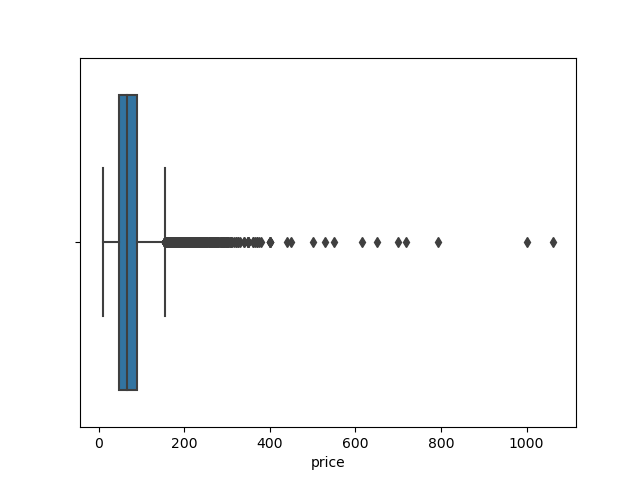

<AxesSubplot:xlabel='price'>

In [87]:
%matplotlib inline
%matplotlib notebook
sns.boxplot(data.price)

In [88]:
outliers = data[data.price > 155].index

In [89]:
data.drop(outliers, axis= 0 , inplace = True)

In [90]:
data.shape

(10408, 8)

In [91]:
data.drop('availability', axis= 1 , inplace = True)

In [92]:
data.head()

,area_type,size,total_sqft,bath,price,RK,Ready_to_move
0,Super built-up Area,2.0,1056.0,2.0,39.07,0,0
2,Built-up Area,3.0,1440.0,2.0,62.00,0,1
3,Super built-up Area,3.0,1521.0,3.0,95.00,0,1
4,Super built-up Area,2.0,1200.0,2.0,51.00,0,1
5,Super built-up Area,2.0,1170.0,2.0,38.00,0,1


In [93]:
df = pd.get_dummies(data['area_type'])

In [94]:
data = pd.concat([data, df], axis= 1)

In [95]:
data.drop('area_type', axis= 1 , inplace = True)

In [96]:
data

,size,total_sqft,bath,price,RK,Ready_to_move,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,2.0,1056.0,2.0,39.07,0,0,0,0,0,1
2,3.0,1440.0,2.0,62.00,0,1,1,0,0,0
3,3.0,1521.0,3.0,95.00,0,1,0,0,0,1
4,2.0,1200.0,2.0,51.00,0,1,0,0,0,1
5,2.0,1170.0,2.0,38.00,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13312,2.0,1262.0,2.0,47.00,0,1,0,0,0,1
13313,3.0,1345.0,2.0,57.00,0,1,0,0,0,1
13314,3.0,1715.0,3.0,112.00,0,1,0,0,0,1
13317,2.0,1141.0,2.0,60.00,0,1,1,0,0,0


In [97]:
from sklearn.preprocessing import Normalizer, StandardScaler

In [98]:
nor = StandardScaler()
x = nor.fit_transform(data[['total_sqft','price']])

In [99]:
nor_df = pd.DataFrame(x, columns=['total_sqft_','price_'])

In [100]:
ds = pd.concat([data, nor_df], axis= 1)

In [101]:
data

,size,total_sqft,bath,price,RK,Ready_to_move,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,2.0,1056.0,2.0,39.07,0,0,0,0,0,1
2,3.0,1440.0,2.0,62.00,0,1,1,0,0,0
3,3.0,1521.0,3.0,95.00,0,1,0,0,0,1
4,2.0,1200.0,2.0,51.00,0,1,0,0,0,1
5,2.0,1170.0,2.0,38.00,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13312,2.0,1262.0,2.0,47.00,0,1,0,0,0,1
13313,3.0,1345.0,2.0,57.00,0,1,0,0,0,1
13314,3.0,1715.0,3.0,112.00,0,1,0,0,0,1
13317,2.0,1141.0,2.0,60.00,0,1,1,0,0,0


In [102]:
ds

,size,total_sqft,bath,price,RK,Ready_to_move,Built-up Area,Carpet Area,Plot Area,Super built-up Area,total_sqft_,price_
0,2.0,1056.0,2.0,39.07,0.0,0.0,0.0,0.0,0.0,1.0,-0.620297,-0.975962
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.519204,-0.207320
2,3.0,1440.0,2.0,62.00,0.0,1.0,1.0,0.0,0.0,0.0,0.759568,0.898880
3,3.0,1521.0,3.0,95.00,0.0,1.0,0.0,0.0,0.0,1.0,-0.192984,-0.576054
4,2.0,1200.0,2.0,51.00,0.0,1.0,0.0,0.0,0.0,1.0,-0.282008,-1.011830
...,...,...,...,...,...,...,...,...,...,...,...,...
13312,2.0,1262.0,2.0,47.00,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN
13313,3.0,1345.0,2.0,57.00,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN
13314,3.0,1715.0,3.0,112.00,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN
13317,2.0,1141.0,2.0,60.00,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN


In [103]:
ds.drop(['total_sqft','price'], axis= 1 , inplace = True)

In [104]:
ds.dropna(inplace=True)

In [105]:
ds.shape

(8136, 10)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X = ds.drop(['price_'] , axis=1)
y = ds['price_']

In [108]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

# 

## Model 

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
reg = LinearRegression()

In [111]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [112]:
reg.score(xtrain, ytrain)

0.43167671497040094

In [113]:
reg.score(xtest, ytest)

0.4632800988787962

# 

In [114]:
from sklearn.linear_model import Lasso, Ridge

In [115]:
reg = Ridge()

In [116]:
reg.fit(xtrain, ytrain)

Ridge()

In [117]:
reg.score(xtrain, ytrain)

0.4316762520231754

In [118]:
reg.score(xtest, ytest)

0.463263673305898

# 

In [119]:
from sklearn.tree import DecisionTreeRegressor

In [120]:
reg = DecisionTreeRegressor()

In [121]:
reg.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [122]:
reg.score(xtrain, ytrain)

0.7756724611292277

In [123]:
reg.score(xtest, ytest)

0.26074373836554465

# 

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
reg = RandomForestRegressor(n_estimators=1000)

In [126]:
reg.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=1000)

In [127]:
reg.score(xtrain, ytrain)

0.7435801180472809

In [128]:
reg.score(xtest, ytest)

0.41695337226262175

# 

In [129]:
from xgboost import XGBRegressor

In [130]:
reg = XGBRegressor()

In [131]:
reg.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [132]:
reg.score(xtrain, ytrain)

0.658803458114549

In [133]:
reg.score(xtest, ytest)

0.47347897457918475